Title: Computational Fluid Dynamics 03: Grids for airfoils
Date: 2017-05-09 08:30
Category: ComputationalFluidDynamics
Tags: Python, grid generation
Slug: cfd-03-grids-for-airfoils
Cover: /p5103/img5103/output_7_0.png
Authors: Peter Schuhmacher
Summary: Vectorized Python code to generate grids for airfoils

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr

def scale01(z):   #--- transform z to [0 ..1]
    return (z-np.min(z))/(np.max(z)-np.min(z))

def scale11(z):   #--- transform z to [-1 ..1]
    return 2.0*(scale01(z)-0.5)

def redu(A): return A[0:-1,0:-1]

## Create your own NACA airfoil profile

Here http://airfoiltools.com/ is a online tool where you can generate your own profil of an airfoil.

#### Graphical display of the profile

In [4]:
px = np.array([9.86442e-01, 9.75972e-01, 9.62609e-01, 9.46424e-01, 9.27507e-01, 9.05965e-01, 8.81917e-01, 8.55503e-01, 8.26873e-01, 7.96195e-01, 7.63650e-01, 7.29431e-01, 6.93744e-01, 6.56806e-01,
       6.18842e-01, 5.80087e-01, 5.40782e-01, 5.01174e-01, 4.61516e-01, 4.22059e-01, 3.82788e-01, 3.43869e-01, 3.05921e-01, 2.69213e-01, 2.34002e-01, 2.00539e-01, 1.69056e-01, 1.39770e-01,
       1.12880e-01, 8.85600e-02, 6.69640e-02, 4.82210e-02, 3.24370e-02, 1.96930e-02, 1.00510e-02, 3.54700e-03, 1.98000e-04, 0.00000e+00, 2.88500e-03, 8.76500e-03, 1.75790e-02, 2.92500e-02,
       4.36840e-02, 6.07730e-02, 8.03960e-02, 1.02423e-01, 1.26714e-01, 1.53123e-01, 1.81496e-01, 2.11676e-01, 2.43499e-01, 2.76797e-01, 3.11395e-01, 3.47114e-01, 3.83767e-01, 4.21506e-01,
       4.60025e-01, 4.98826e-01, 5.37677e-01, 5.76348e-01, 6.14603e-01, 6.52211e-01, 6.88939e-01, 7.24559e-01, 7.58849e-01, 7.91590e-01, 8.22575e-01, 8.51604e-01, 8.78488e-01, 9.03052e-01,
       9.25133e-01, 9.44583e-01, 9.61271e-01, 9.75084e-01, 9.85928e-01])
py = np.array([ 0.003794,  0.006669,  0.010271,  0.014531,  0.019373,  0.024709,  0.030445,  0.036484,  0.042724,  0.049065,  0.055404,  0.061641,  0.06768 ,  0.073424,  0.078785,  0.083676,  0.088018,
        0.091737,  0.094768,  0.097055,  0.09851 ,  0.098792,  0.09784 ,  0.095689,  0.092396,  0.088044,  0.082734,  0.076589,  0.069743,  0.062343,  0.05454 ,  0.046485,  0.038325,  0.030193,
        0.022209,  0.014471,  0.007052,  0.      , -0.006437, -0.012027, -0.016779, -0.020704, -0.023825, -0.026172, -0.027782, -0.028706, -0.029   , -0.028733, -0.027985, -0.026841, -0.025397,
       -0.023753, -0.022012, -0.020277, -0.01865 , -0.01716 , -0.015589, -0.01396 , -0.012326, -0.010734, -0.009222, -0.007818, -0.006542, -0.005403, -0.004404, -0.003543, -0.002811, -0.002197,
       -0.001688, -0.001271, -0.000931, -0.000659, -0.000443, -0.000277, -0.000153])
nn = len(px)

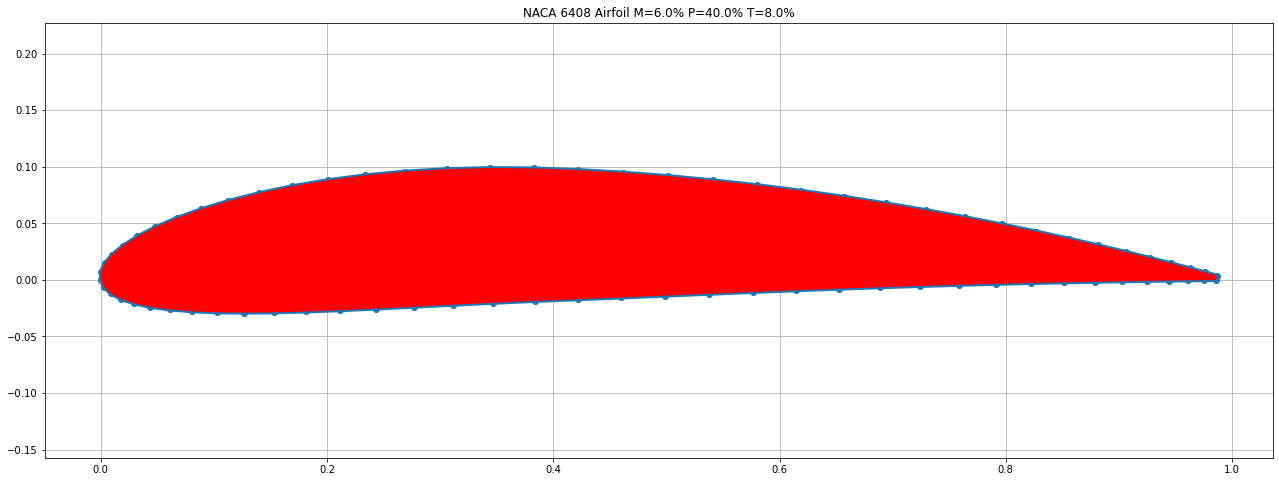

In [5]:
fig, ax = plt.subplots(figsize=(22,8))
ax.plot(px,py,'o-',lw=4)
ax.fill(px,py,'r', zorder=10)
ax.grid(True, zorder=5)
ax.set_aspect('equal', 'datalim')
plt.title('NACA 6408 Airfoil M=6.0% P=40.0% T=8.0%')
plt.show()

## O-grid

This is a polar type grid. The lower boundary is now given by the data of the airfoil. The grid is steched in r-direction so that the grid points are concentrated near the airfoil surface. Angel $\phi$ is not fully closed for demonstration purposes only.

In [6]:
def fStretch(my):
    yStretch = 0.5; yOffset = 2.95  #control Parameters
    iy =np.linspace(0,1,my)
    sy = scale01(np.exp((yStretch*(yOffset+iy))**2));  # build streched 
    return sy

def coord (a,b,xi):
       return a + xi*(b-a)
    
#--- outer circle, north boundary ------
R   = 1.25;
cx  = px[nn//4]; cy=py[nn//4]
phi = np.linspace(0.02,1.98*np.pi, nn) #for demonstration only, (0.0,2.0*np.pi, nn) else
Rtx = R*np.cos(phi) +cx; 
Rty = R*np.sin(phi)

mx = px.size    # number of points in x-direction
my = 10         # number of points in y-direction

#--- initialize the 2D arrays of coordinates ---------
xk = np.zeros((mx,my))
yk = np.zeros((mx,my))

yEta = fStretch(my)   # strechting in y-direction

#--- assemble the coord arrays ------------------
for t in range(0,mx):
    xk[t,:] = coord(px[t], Rtx[t],yEta)
    yk[t,:] = coord(py[t], Rty[t],yEta)

#### Graphical display

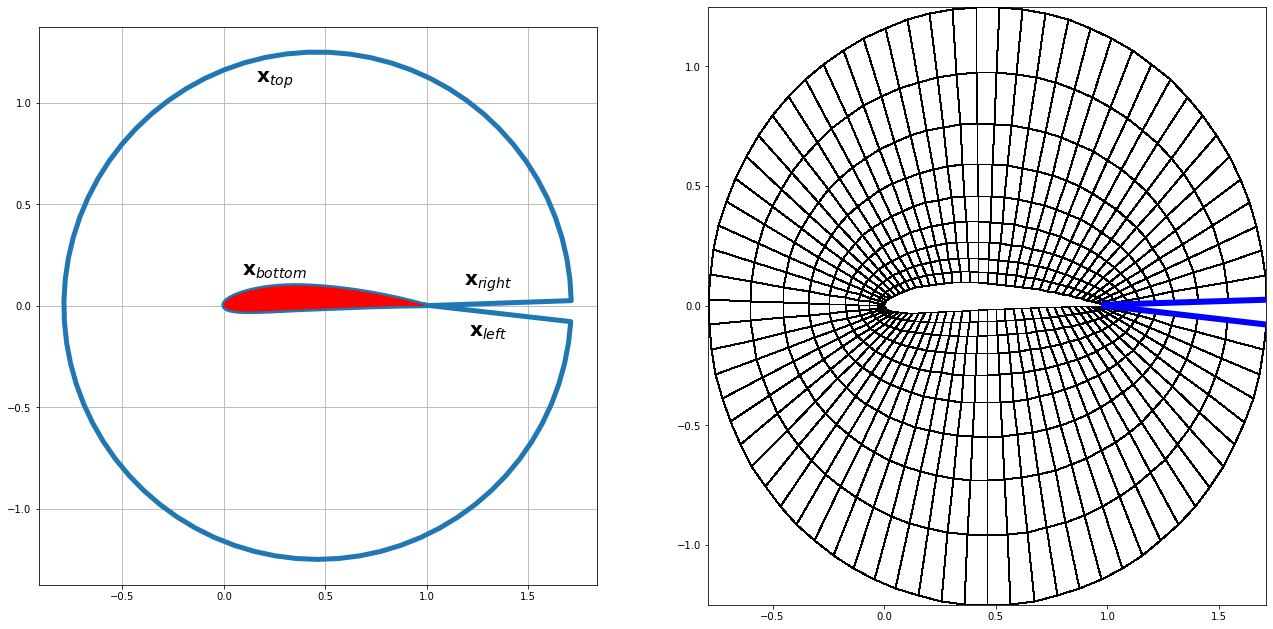

In [7]:
#---- grafics --------------------------------------------------------
fig = plt.figure(figsize=(22,11)) 
ax = fig.add_subplot(121)
Gx = np.append(np.append(px,Rtx),px[0])
Gy = np.append(np.append(py,Rty),py[0])
ax.plot(Gx,Gy, '-', lw=5 )
ax.fill(px, py, 'r',zorder=10)
plt.text(0.25, 0.15, r"$\mathbf{x}_{bottom}$",horizontalalignment='center', fontsize=20)
plt.text(0.25, 1.10, r"$\mathbf{x}_{top}$",   horizontalalignment='center', fontsize=20)
plt.text(1.30, 0.10, r"$\mathbf{x}_{right}$", horizontalalignment='center', fontsize=20)
plt.text(1.30,-0.15, r"$\mathbf{x}_{left}$",  horizontalalignment='center', fontsize=20)
ax.grid(True, zorder=5)
ax.set_aspect('equal')

myCmap = mclr.ListedColormap(['white','white'])
ax4 = fig.add_subplot(122)
ax4.pcolormesh(xk, yk, redu(np.zeros_like(xk)), edgecolors='k', linewidths=1, cmap=myCmap)
ax4.plot((px[0], Rtx[0] ),(py[0], Rty[0]), 'b-',lw=6)
ax4.plot((px[-1],Rtx[-1]),(py[-1],Rty[-1]),'b-',lw=6)
#ax4.fill(px, py, 'r',zorder=10)
plt.show()
ax4.set_aspect('equal')

plt.show()

## C-grid

Concerning the grid point economics the C-grid is useful to have more grid pints downwind the airfoil. The grid has to be generated in several patches that are concatenated. It needs a certain effort to get smooth interfaces which are not optimized in this example.

In [8]:
#nn = nk//2
ix1 = nn//4; ix2 = nn-ix1

R = 1.25; dy = 0.01; dx = 0.005
xback = 2.0
#--- lower boundary ---------------------------
q1x = np.linspace(xback,1.0+dx,20); q1y = np.zeros_like(q1x)+dy; 
q2x = px[  0:ix1-1];                q2y = py[  0:ix1-1]
q3x = px[ix1:ix2-1];                q3y = py[ix1:ix2-1]
q4x = px[ix2:nn-1];                 q4y = py[ix2:nn-1]
q5x = np.linspace(1.0+dx,xback,20); q5y = np.zeros_like(q5x)-dy; 

qtx = np.array([]);                 qty = np.array([]);
qtx = np.append(np.append(np.append(np.append(q1x,q2x),q3x),q4x),q5x)
qty = np.append(np.append(np.append(np.append(q1y,q2y),q3y),q4y),q5y)

#--- upper boundary ------------------------------
Q1x = np.linspace(q1x[0],q2x[-1],q1x.size+q2x.size)
Q1y = R*np.ones_like(Q1x)

cx = q3x[0]; cy=q3y[0]
phi = np.linspace(ix1+1,ix2, q3x.size)
phi = scale01(phi)*np.pi + 0.5*np.pi

Q2x = R*np.cos(phi) +cx; 
Q2y = R*np.sin(phi)

Q3x =  np.linspace(q2x[-1],q1x[0],q1x.size+q2x.size)
Q3y = -R*np.ones_like(Q3x)

Qtx = np.append(np.append(Q1x,Q2x),Q3x)
Qty = np.append(np.append(Q1y,Q2y),Q3y)


#### Graphical display

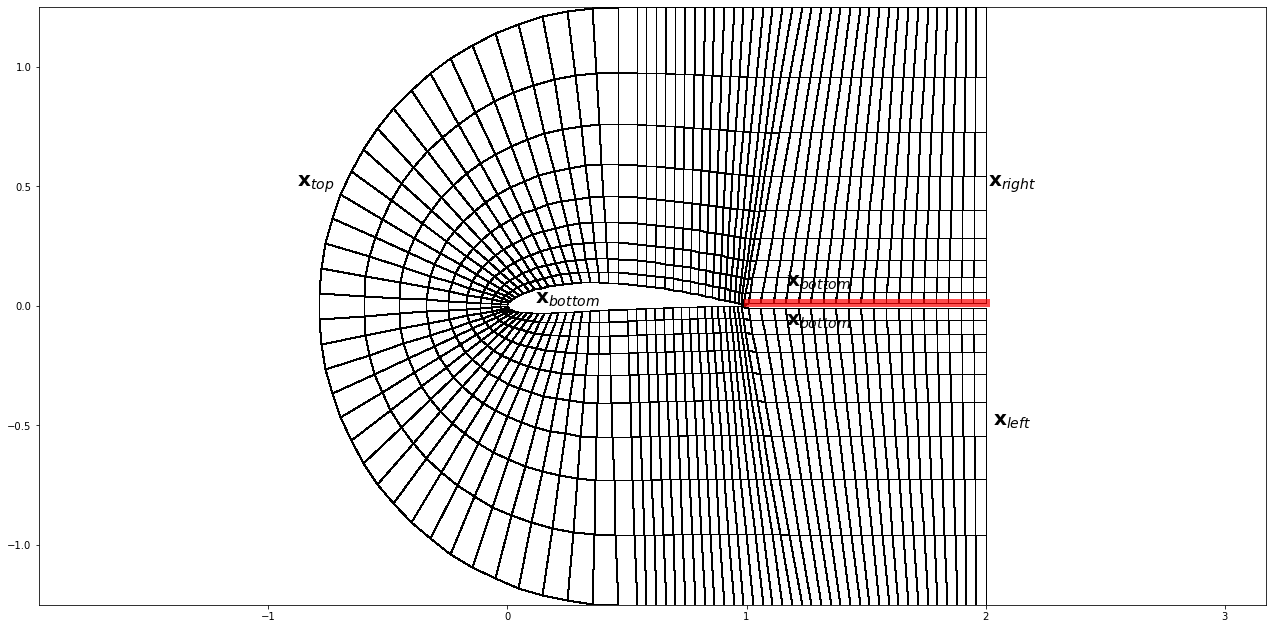

In [9]:
mx = qtx.size         # number of points in x-direction
my = 10               # number of points in y-direction
gsi = fStretch(my)    # streching in y-direction

#---- initialize ---------------------
xk = np.zeros((mx,my))
yk = np.zeros((mx,my))

#---- complete the 2D x-and y-coord -------------------------------------------
for t in range(0,mx):
    xk[t,:] = coord(qtx[t], Qtx[t],gsi)
    yk[t,:] = coord(qty[t], Qty[t],gsi)

#---- grafics ----------------------------------------------------------------
fig = plt.figure(figsize=(22,11)) 
myCmap = mclr.ListedColormap(['white','white'])
ax4 = fig.add_subplot(111)
ax4.pcolormesh(xk, yk, redu(0*xk), edgecolors='k', linewidths=1, cmap=myCmap)
ax4.plot(q1x,q1y,'r-', lw=8,alpha=0.7 )
plt.text(0.25, 0.01,r"$\mathbf{x}_{bottom}$",horizontalalignment='center', fontsize=20)
plt.text(-0.8, 0.50,r"$\mathbf{x}_{top}$",   horizontalalignment='center', fontsize=20)
plt.text(1.30, 0.08,r"$\mathbf{x}_{bottom}$",horizontalalignment='center', fontsize=20)
plt.text(1.30,-0.08,r"$\mathbf{x}_{bottom}$",horizontalalignment='center', fontsize=20)
plt.text(2.11, 0.5, r"$\mathbf{x}_{right}$", horizontalalignment='center', fontsize=20)
plt.text(2.11,-0.5, r"$\mathbf{x}_{left}$",  horizontalalignment='center', fontsize=20)
ax4.set_aspect('equal', 'datalim')
plt.show()

In [10]:
#http://airfoiltools.com/
#NACA NACA 4412 Airfoil M=4.0% P=40.0% T=12.0%
import numpy as np

airfoil = np.array(['''
  0.986442  0.003794
  0.975972  0.006669
  0.962609  0.010271
  0.946424  0.014531
  0.927507  0.019373
  0.905965  0.024709
  0.881917  0.030445
  0.855503  0.036484
  0.826873  0.042724
  0.796195  0.049065
  0.763650  0.055404
  0.729431  0.061641
  0.693744  0.067680
  0.656806  0.073424
  0.618842  0.078785
  0.580087  0.083676
  0.540782  0.088018
  0.501174  0.091737
  0.461516  0.094768
  0.422059  0.097055
  0.382788  0.098510
  0.343869  0.098792
  0.305921  0.097840
  0.269213  0.095689
  0.234002  0.092396
  0.200539  0.088044
  0.169056  0.082734
  0.139770  0.076589
  0.112880  0.069743
  0.088560  0.062343
  0.066964  0.054540
  0.048221  0.046485
  0.032437  0.038325
  0.019693  0.030193
  0.010051  0.022209
  0.003547  0.014471
  0.000198  0.007052
  0.000000  0.000000
  0.002885 -0.006437
  0.008765 -0.012027
  0.017579 -0.016779
  0.029250 -0.020704
  0.043684 -0.023825
  0.060773 -0.026172
  0.080396 -0.027782
  0.102423 -0.028706
  0.126714 -0.029000
  0.153123 -0.028733
  0.181496 -0.027985
  0.211676 -0.026841
  0.243499 -0.025397
  0.276797 -0.023753
  0.311395 -0.022012
  0.347114 -0.020277
  0.383767 -0.018650
  0.421506 -0.017160
  0.460025 -0.015589
  0.498826 -0.013960
  0.537677 -0.012326
  0.576348 -0.010734
  0.614603 -0.009222
  0.652211 -0.007818
  0.688939 -0.006542
  0.724559 -0.005403
  0.758849 -0.004404
  0.791590 -0.003543
  0.822575 -0.002811
  0.851604 -0.002197
  0.878488 -0.001688
  0.903052 -0.001271
  0.925133 -0.000931
  0.944583 -0.000659
  0.961271 -0.000443
  0.975084 -0.000277
  0.985928 -0.000153 '''])

b  = np.chararray.split(airfoil)
c  = np.array([float(x) for x in b[0]])
nk = c.size
nn = nk//2
px = c[0:nk-1:2]; py = c[1:nk:2]
print(nk, px.size, py.size)

150 75 75
